In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 9 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (4206/4206), done.


In [2]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=208091 sha256=0993ba2448b3db644b4e2e4429d8ce317c59ab5fd5d5b157216ae6c123606f29
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20456 sha256=af624feaf99ff896fdf76862d2471e55c26f26ead0cd8f19471624bde0411d50
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-retinanet keras-resnet


In [3]:
!python setup.py build_ext --inplace

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build_ext
copying build/lib.linux-x86_64-cpython-310/keras_retinanet/utils/compute_overlap.cpython-310-x86_64-linux-gnu.so -> keras_retinanet/utils


In [5]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [10]:
import urllib.request

url = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(url, 'pretrained_model.h5')


('pretrained_model.h5', <http.client.HTTPMessage at 0x7d71637c4d00>)

In [11]:
model = models.load_model('pretrained_model.h5')

In [12]:
model.summary()

Model: "retinanet-bbox"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 padding_conv1 (ZeroPadding  (None, None, None, 3)        0         ['input_1[0][0]']             
 2D)                                                                                              
                                                                                                  
 conv1 (Conv2D)              (None, None, None, 64)       9408      ['padding_conv1[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, None, None, 64)       256       ['conv1[0][0]']  

In [18]:
!wget https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt

--2024-04-22 03:52:32--  https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘coco_categories.txt’

coco_categories.txt     [ <=>                ]     621  --.-KB/s    in 0s      

2024-04-22 03:52:32 (126 MB/s) - ‘coco_categories.txt’ saved [621]



In [ ]:
class_names = [l.rstrip() for l in open('coco_categories.txt')]
class_names

In [24]:
def show_image_with_predictions(img_path, threshold = 0.6):

  im = np.array(Image.open(img_path))
  print('im.shape:', im.shape)

  # if there is a png it will have a alpha channel
  im = im [:,:,:3]

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates

  boxes /= scale

  # loop through each prediction for the input shape
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score<threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color = color)

    class_name= class_names[label]
    caption = f'{class_name} {score:.3f}'
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()





In [25]:
plt.rcParams['figure.figsize'] = [20,10]

In [26]:
!wget https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg

--2024-04-22 04:01:27--  https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162736 (159K) [image/jpeg]
Saving to: ‘baseball.jpg.1’

baseball.jpg.1      100%[===================>] 158.92K  --.-KB/s    in 0.02s   

2024-04-22 04:01:27 (7.06 MB/s) - ‘baseball.jpg.1’ saved [162736/162736]



im.shape: (430, 638, 3)


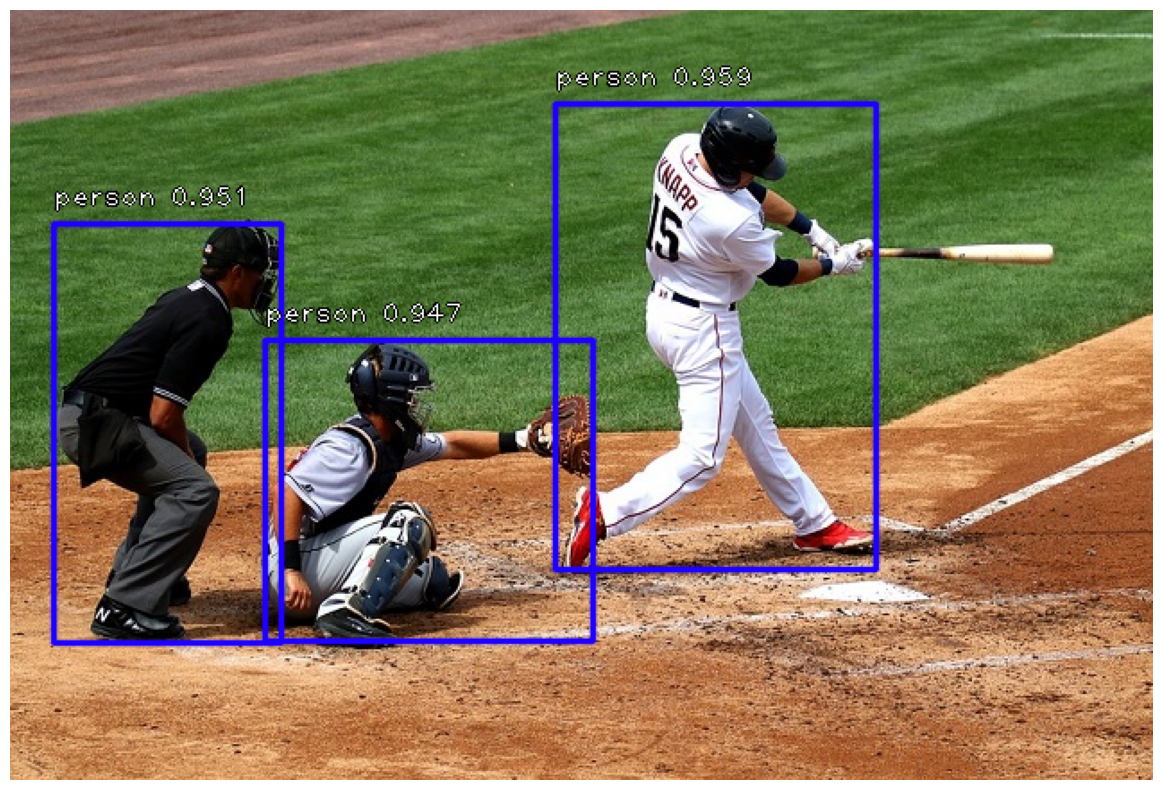

In [27]:
show_image_with_predictions('baseball.jpg')

In [28]:
!wget https://lazyprogrammer.me/course_files/obj_detection/cars.jpg

--2024-04-22 04:02:29--  https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220485 (215K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 215.32K  --.-KB/s    in 0.06s   

2024-04-22 04:02:29 (3.25 MB/s) - ‘cars.jpg’ saved [220485/220485]



im.shape: (666, 1000, 3)


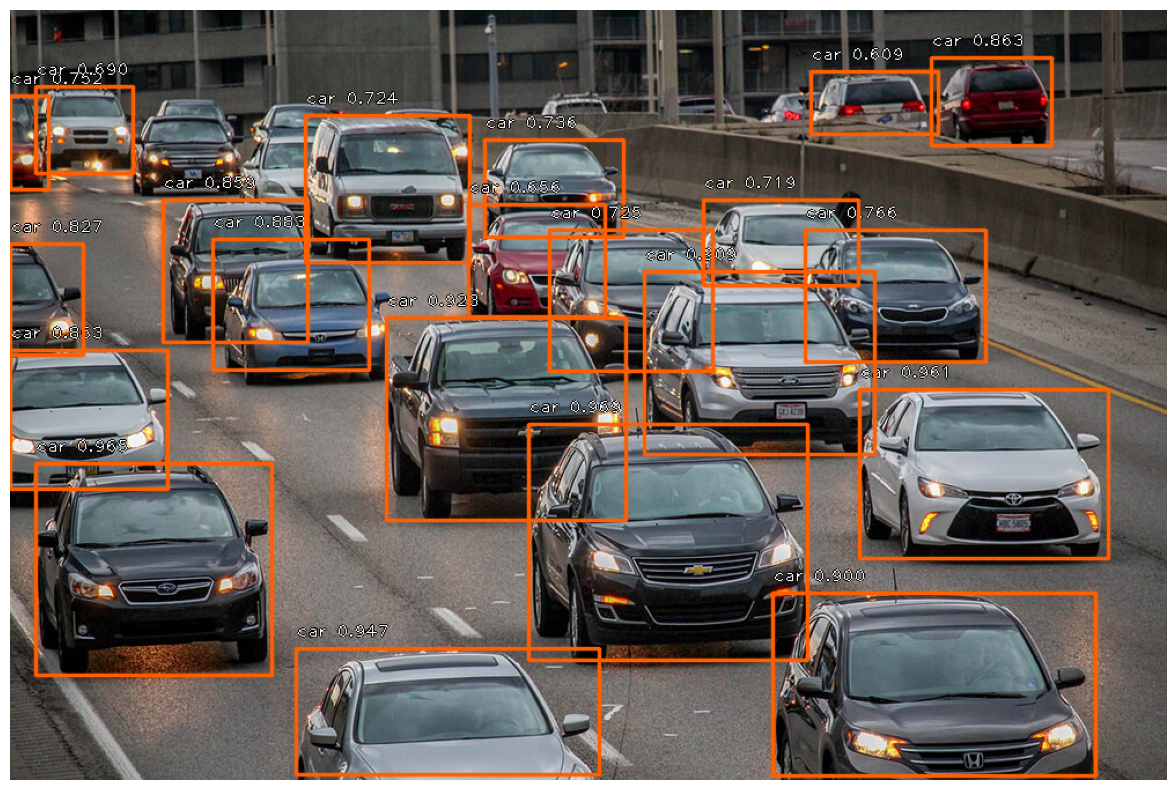

In [29]:
show_image_with_predictions('cars.jpg')

In [30]:
!wget https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg

--2024-04-22 04:03:02--  https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53698 (52K) [image/jpeg]
Saving to: ‘crosswalk.jpg’

crosswalk.jpg       100%[===================>]  52.44K  --.-KB/s    in 0.001s  

2024-04-22 04:03:02 (101 MB/s) - ‘crosswalk.jpg’ saved [53698/53698]



im.shape: (384, 512, 3)


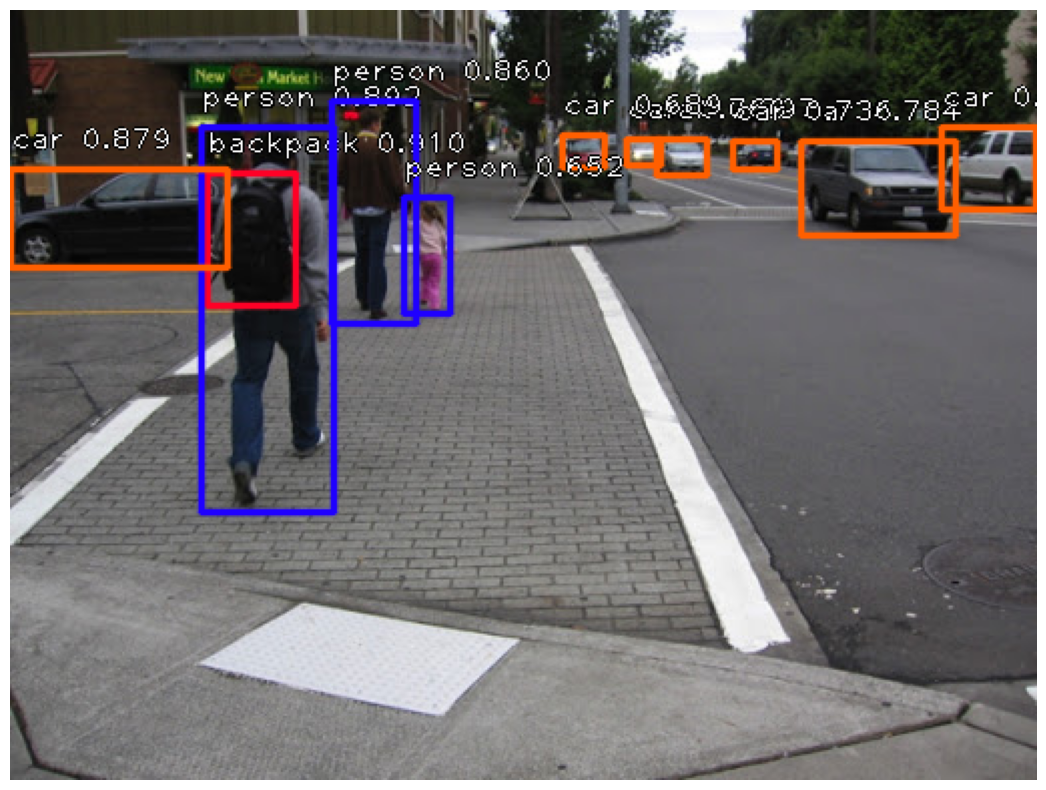

In [31]:
show_image_with_predictions('crosswalk.jpg')

--2024-04-22 04:03:43--  https://lazyprogrammer.me/course_files/obj_detection/laptop.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233204 (228K) [image/jpeg]
Saving to: ‘laptop.jpg’

laptop.jpg          100%[===================>] 227.74K  --.-KB/s    in 0.08s   

2024-04-22 04:03:44 (2.83 MB/s) - ‘laptop.jpg’ saved [233204/233204]

im.shape: (618, 960, 3)


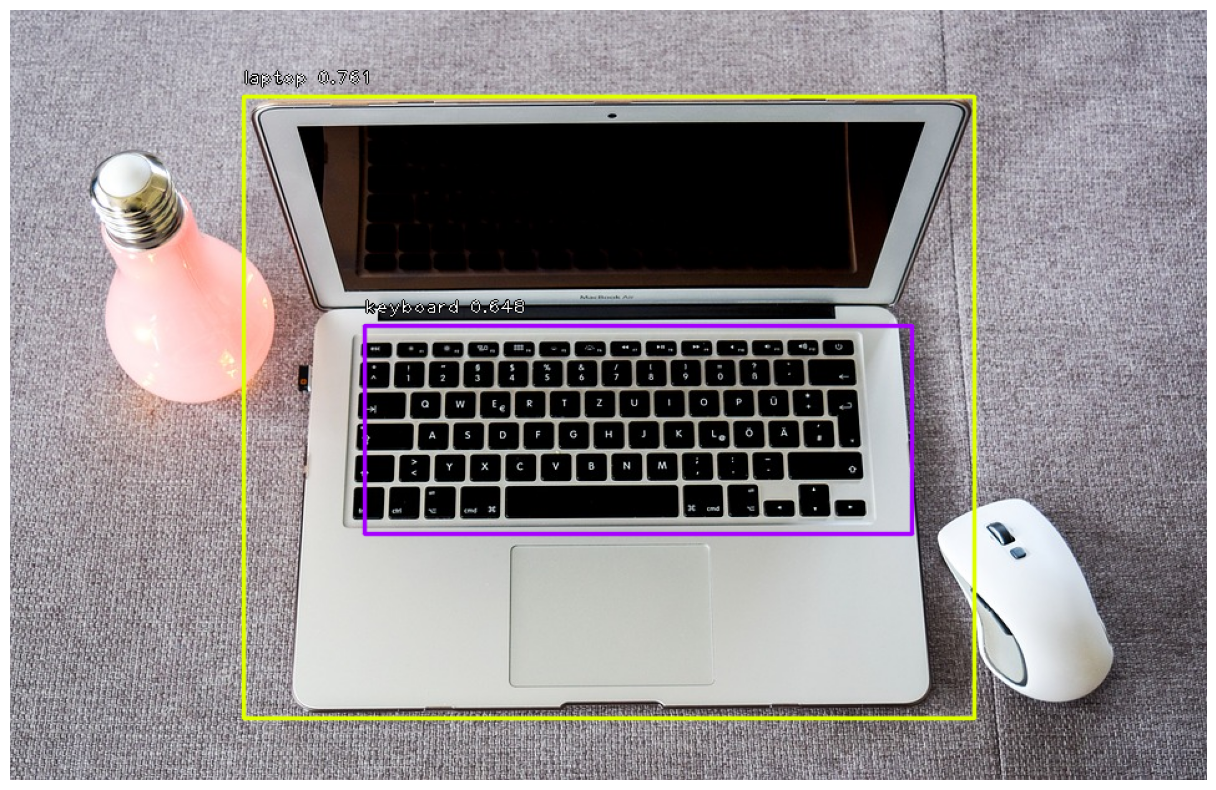

In [32]:
!wget https://lazyprogrammer.me/course_files/obj_detection/laptop.jpg
show_image_with_predictions('laptop.jpg')